# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist #keras is a tf module
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [6]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[0:12] #first 12 of 60k labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

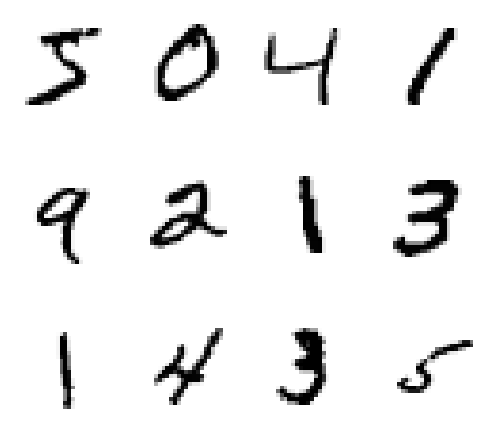

In [10]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
X_valid.shape

(10000, 28, 28)

In [12]:
y_valid.shape

(10000,)

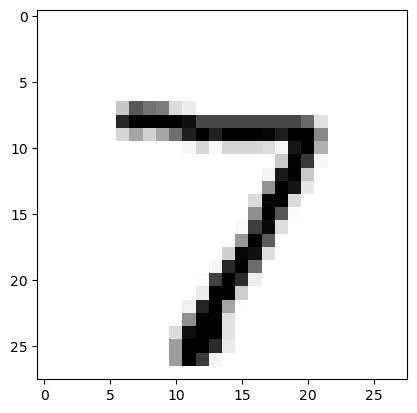

In [14]:
_ = plt.imshow(X_valid[0], cmap='Greys')

In [15]:
X_valid[0] #the pixel values of the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
y_valid[0]

7

#### Preprocess data

In [17]:
X_train = X_train.reshape(60000, 784).astype('float32') #reformat the data shape to arrays
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [18]:
X_train /= 255
X_valid /= 255 #to range from 0 to 1

In [19]:
X_valid[0] #now 1 array of 784 values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes) #one-hot encoding of the labels

In [21]:
y_valid[0] #this one hot encoding helped us reformat the labels into the desired output

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [22]:
model = Sequential() #information would flow sequentially from one layer to the next
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) #64 sigmoid neurons, expect a 784 length array
model.add(Dense(10, activation='softmax'))  #10 neurons to indicate 10 output numbers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
(64*784) #64 neurons in 1st hidden layer, 784 inputs

50176

In [25]:
(64*784)+64 #64 neurons, 784 inputs, 64 biases

50240

In [26]:
(10*64)+10 #10 neurons, 64 inputs(from the 64 neurons in previous layers), 10 biases in output layer

650

#### Configure model

In [27]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Train!

In [28]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 2ms/step - loss: 0.0937 - accuracy: 0.1426 - val_loss: 0.0927 - val_accuracy: 0.1797
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.1974 - val_loss: 0.0913 - val_accuracy: 0.2189
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.2301 - val_loss: 0.0905 - val_accuracy: 0.2464
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.2535 - val_loss: 0.0898 - val_accuracy: 0.2654
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.2663 - val_loss: 0.0893 - val_accuracy: 0.2752
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.2758 - val_loss: 0.0889 - val_accuracy: 0.2829
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.2876 - val_loss: 0.0885 - val_accuracy: 0.2994

#### Evaluating model performance

In [29]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.8640


[0.027278197929263115, 0.8640000224113464]

#### Performing inference

In [30]:
valid_0 = X_valid[0].reshape(1, 784) #validate the model on one digit

In [31]:
model.predict(valid_0) #what does the model predict our input to be?

1/1 [==============================] - 0s 73ms/step


array([[0.00435789, 0.00173818, 0.00270244, 0.00870994, 0.0049129 ,
        0.00686297, 0.00093237, 0.9306542 , 0.0043848 , 0.03474437]],
      dtype=float32)

In [29]:
# model.predict_classes(valid_0)

In [32]:
# The predict_classes() method no longer exists in recent TensorFlow releases. 
# Instead you could use:
import numpy as np
np.argmax(model.predict(valid_0), axis=-1)

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)

#### perceptron model
w.x+b > 0 output 1 else output 0 <br>
w = weight <br>
x = value <br>
b = bias(negate threshold) <br>

Perceptron model ain't got no finesse, its either silent or its screaminggg <br>

#### Sigmoid Function (Activation Function), where range 0 to 1 is needed as output.
Cool dude, curvy shape = sigma(z) = 1/1+e**-z z=w.x+b <br>

Activation functions produce activations <br>

Neuron saturation, when activation functions are stuck in the extreme's of z. <br>

#### tanh similar to sigmoid (it goes from -1 to 1), help solve the neuron saturation problem.

### RELU function = max(0,z), preferred neuron